# 1.import libraries

In [15]:
import numpy as np
import pandas as pd
import missingno as mn
import matplotlib.pyplot as plt
import seaborn as sns

# 2.import dataset

In [16]:
df=pd.read_csv("/content/Sleep_health_and_lifestyle_dataset 1.csv")

In [17]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6.0,42.0,6.0,Overweight,126/83,77.0,4200,None
1,2,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000,None
2,3,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000,None
3,4,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,397,Female,49,Nurse,NaN,5.0,10.0,9.0,Normal Weight,145/86,76.0,8000,None
397,398,Female,36,Nurse,7.1,7.0,NaN,NaN,Normal Weight,135/77,NaN,8000,None
398,399,Female,58,Nurse,6.8,6.0,30.0,3.0,Normal Weight,145/88,76.0,8000,Sleep Apnea
399,400,Female,32,Nurse,7.5,9.0,70.0,2.0,Normal Weight,147/79,76.0,8000,Sleep Apnea


In [18]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6.0,42.0,6.0,Overweight,126/83,77.0,4200,None
1,2,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000,None
2,3,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000,None
3,4,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000,Sleep Apnea


In [19]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
396,397,Female,49,Nurse,NaN,5.0,10.0,9.0,Normal Weight,145/86,76.0,8000,None
397,398,Female,36,Nurse,7.1,7.0,NaN,NaN,Normal Weight,135/77,NaN,8000,None
398,399,Female,58,Nurse,6.8,6.0,30.0,3.0,Normal Weight,145/88,76.0,8000,Sleep Apnea
399,400,Female,32,Nurse,7.5,9.0,70.0,2.0,Normal Weight,147/79,76.0,8000,Sleep Apnea
400,401,male,44,Lawyer,NaN,NaN,20.0,7.0,Overweight,NaN,76.0,8000,None


In [20]:
df.shape

(401, 13)

In [21]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                401 non-null    int64  
 1   Gender                   401 non-null    object 
 2   Age                      401 non-null    int64  
 3   Occupation               401 non-null    object 
 4   Sleep Duration           396 non-null    float64
 5   Quality of Sleep         397 non-null    float64
 6   Physical Activity Level  395 non-null    float64
 7   Stress Level             398 non-null    float64
 8   BMI Category             401 non-null    object 
 9   Blood Pressure           398 non-null    object 
 10  Heart Rate               397 non-null    float64
 11  Daily Steps              401 non-null    int64  
 12  Sleep Disorder           401 non-null    object 
dtypes: float64(5), int64(3), object(5)
memory usage: 40.9+ KB


In [23]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,401.000000,401.000000,396.000000,397.000000,395.000000,398.000000,397.000000,401.000000
mean,201.000000,42.219451,7.126263,7.292191,58.392405,5.396985,70.458438,6859.600998
std,115.902977,8.733941,0.788022,1.201962,21.057944,1.795093,4.314810,1622.610194
min,1.000000,27.000000,5.500000,4.000000,10.000000,2.000000,63.000000,3000.000000
25%,101.000000,35.000000,6.475000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,201.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,301.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,401.000000,60.000000,8.500000,9.000000,90.000000,9.000000,86.000000,10000.000000


# **Data cleaning**

# 3. Handling with missing values

In [24]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             5
Quality of Sleep           4
Physical Activity Level    6
Stress Level               3
BMI Category               0
Blood Pressure             3
Heart Rate                 4
Daily Steps                0
Sleep Disorder             0
dtype: int64

<Axes: >

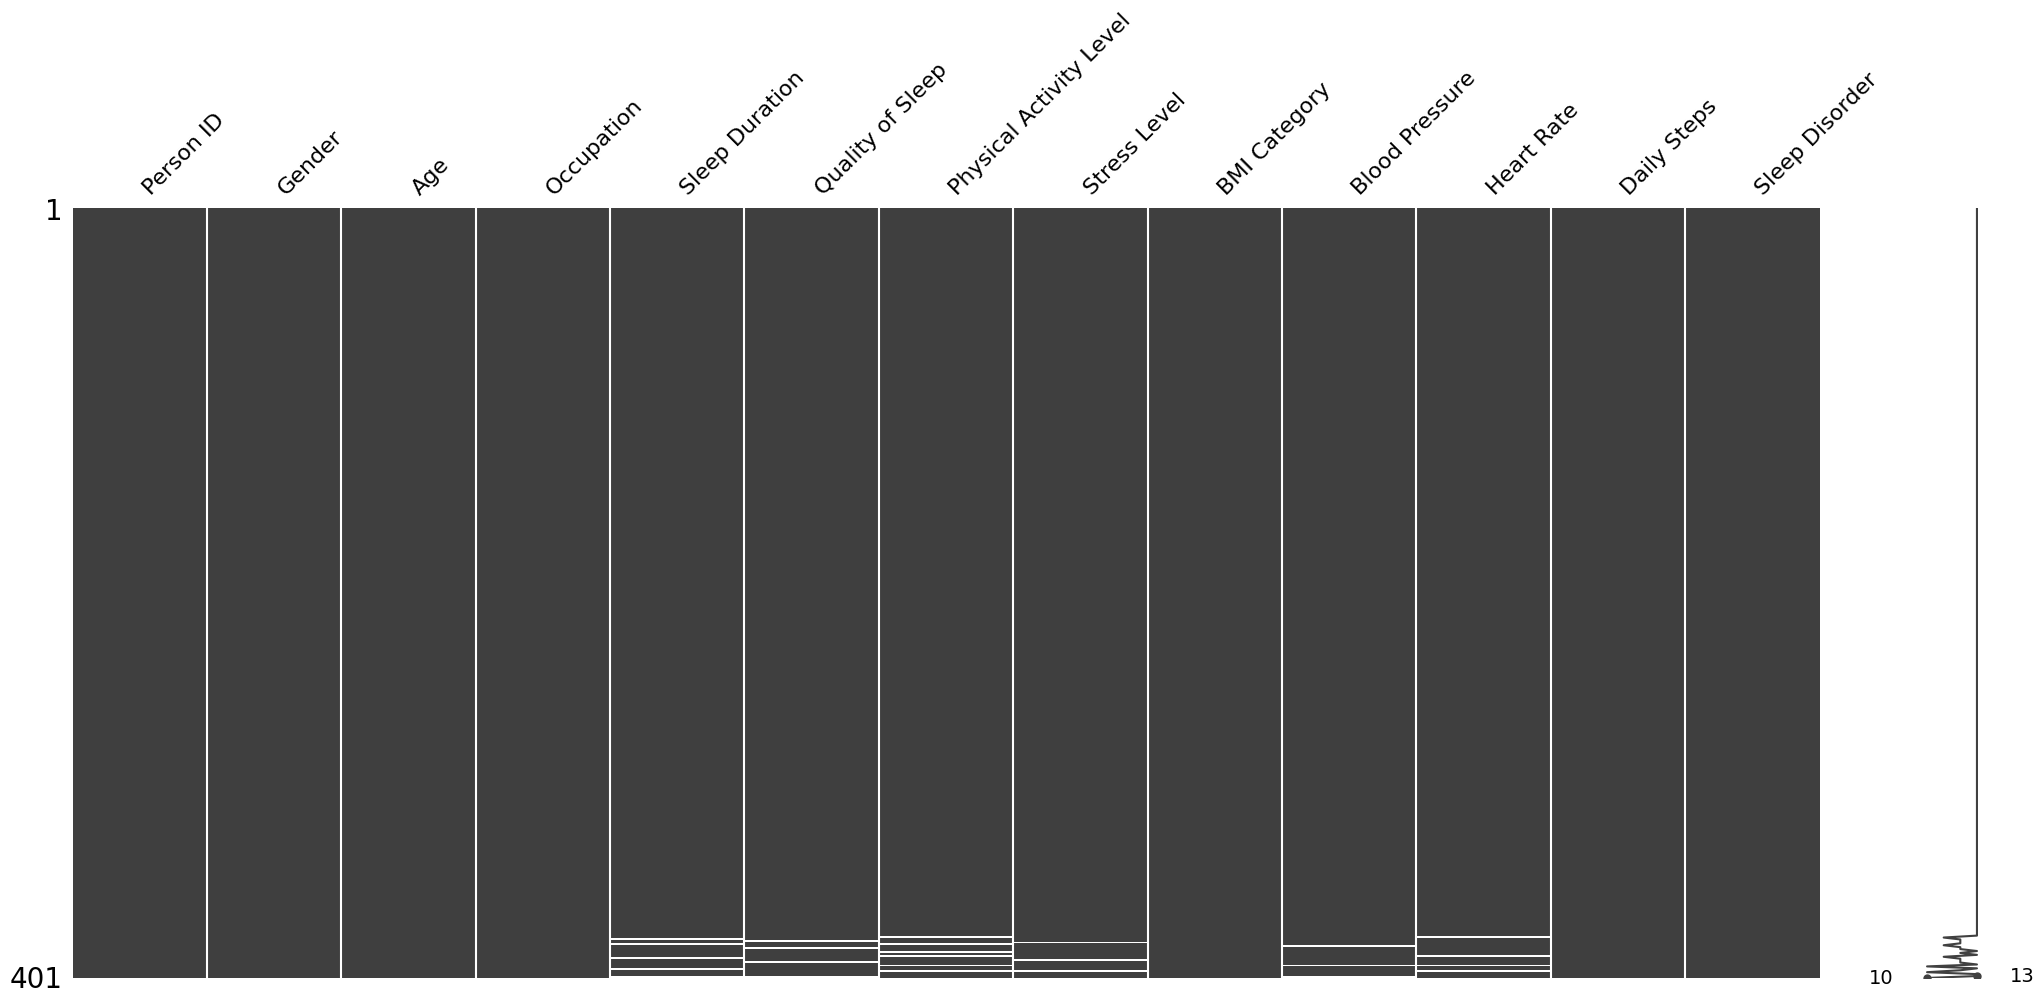

In [25]:
mn.matrix(df)

# 3. Handling with missing values

In [26]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6.0,42.0,6.0,Overweight,126/83,77.0,4200,None
1,2,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000,None
2,3,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000,None
3,4,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,397,Female,49,Nurse,NaN,5.0,10.0,9.0,Normal Weight,145/86,76.0,8000,None
397,398,Female,36,Nurse,7.1,7.0,NaN,NaN,Normal Weight,135/77,NaN,8000,None
398,399,Female,58,Nurse,6.8,6.0,30.0,3.0,Normal Weight,145/88,76.0,8000,Sleep Apnea
399,400,Female,32,Nurse,7.5,9.0,70.0,2.0,Normal Weight,147/79,76.0,8000,Sleep Apnea


In [27]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             5
Quality of Sleep           4
Physical Activity Level    6
Stress Level               3
BMI Category               0
Blood Pressure             3
Heart Rate                 4
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [28]:
df.dropna(axis=0,inplace=True)

In [29]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6.0,42.0,6.0,Overweight,126/83,77.0,4200,None
1,2,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000,None
2,3,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000,None
3,4,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,389,male,31,Engineer,8.0,9.0,80.0,2.0,Normal Weight,145/98,76.0,8000,Sleep Apnea
393,394,male,47,Salesperson,6.5,6.0,40.0,8.0,Normal Weight,147/80,76.0,8000,Sleep Apnea
395,396,male,29,Engineer,7.8,8.0,55.0,6.0,Normal Weight,115/95,76.0,8000,Sleep Apnea
398,399,Female,58,Nurse,6.8,6.0,30.0,3.0,Normal Weight,145/88,76.0,8000,Sleep Apnea


In [30]:
df.shape

(385, 13)

In [31]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                385 non-null    int64  
 1   Gender                   385 non-null    object 
 2   Age                      385 non-null    int64  
 3   Occupation               385 non-null    object 
 4   Sleep Duration           385 non-null    float64
 5   Quality of Sleep         385 non-null    float64
 6   Physical Activity Level  385 non-null    float64
 7   Stress Level             385 non-null    float64
 8   BMI Category             385 non-null    object 
 9   Blood Pressure           385 non-null    object 
 10  Heart Rate               385 non-null    float64
 11  Daily Steps              385 non-null    int64  
 12  Sleep Disorder           385 non-null    object 
dtypes: float64(5), int64(3), object(5)
memory usage: 42.1+ KB


In [33]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

<Axes: >

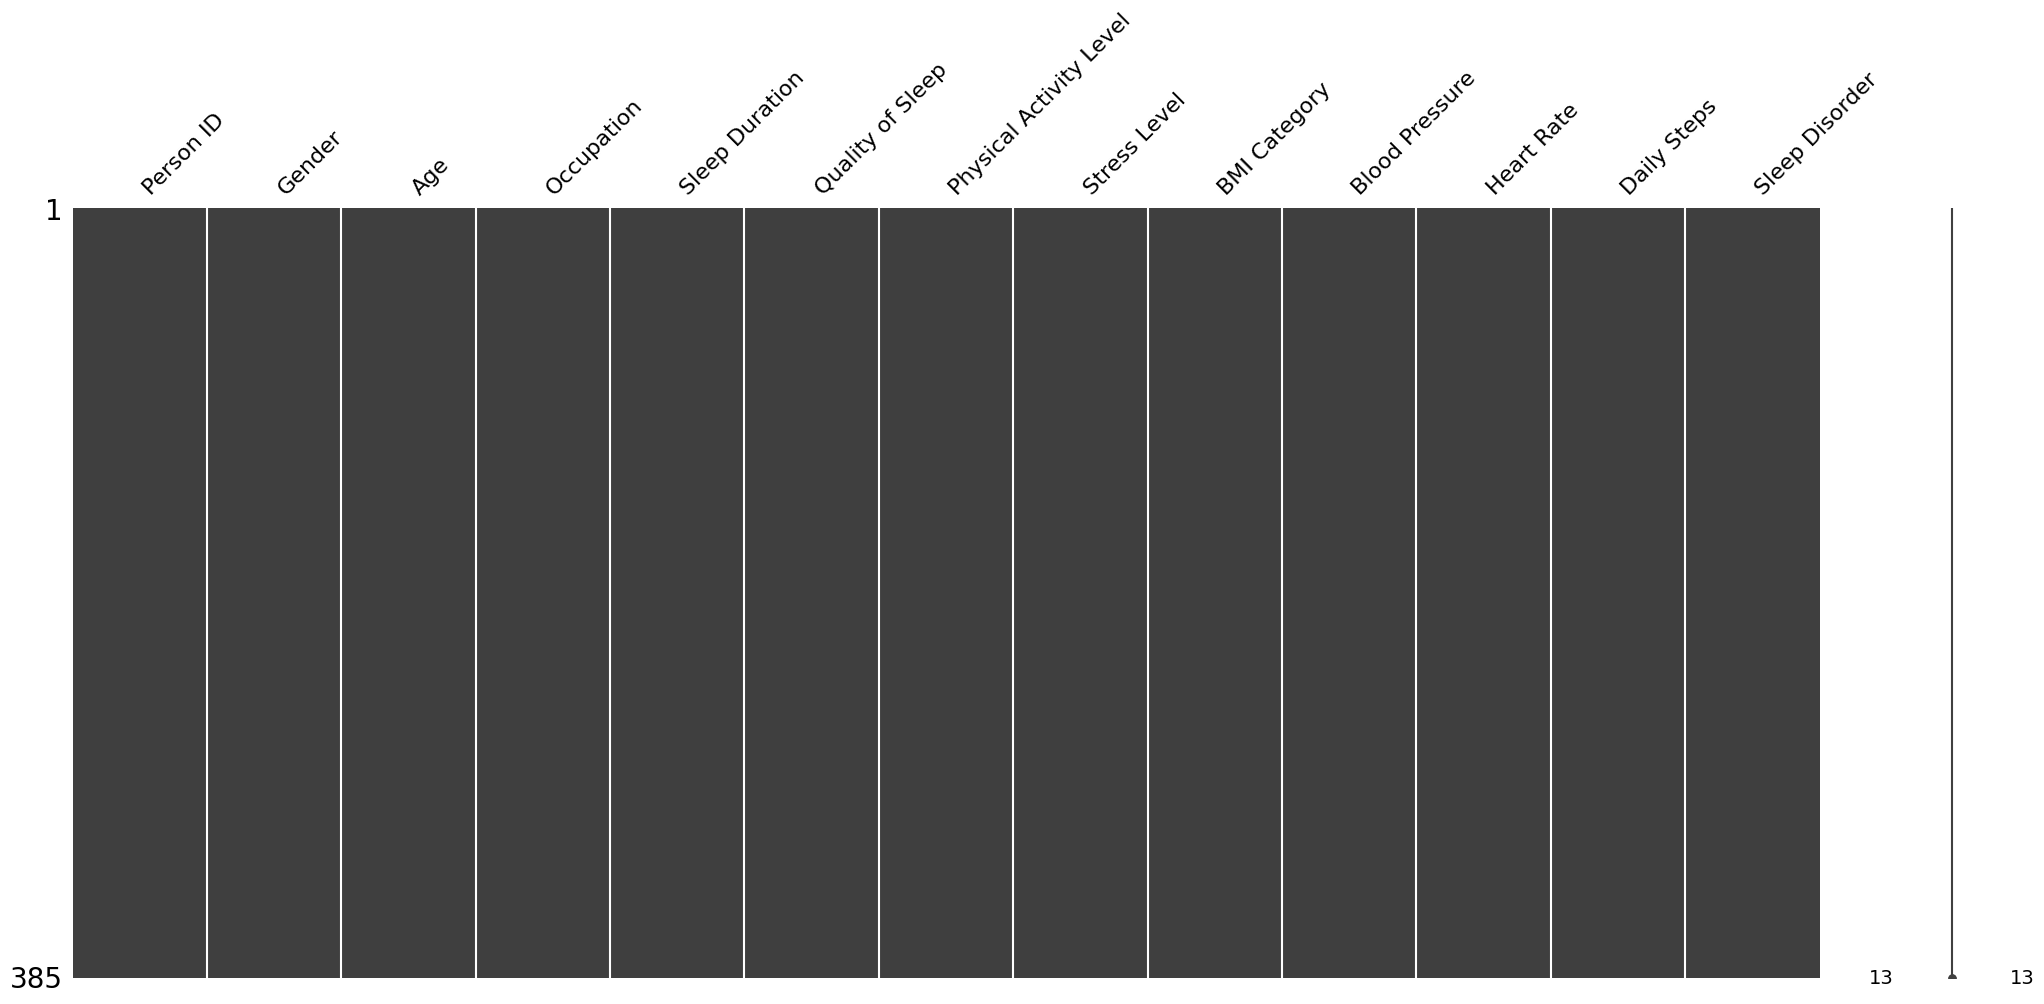

In [34]:
mn.matrix(df)

In [44]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6.0,42.0,6.0,Overweight,126/83,77.0,4200,None
1,2,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000,None
2,3,Male,28,Doctor,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000,None
3,4,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,389,male,31,Engineer,8.0,9.0,80.0,2.0,Normal Weight,145/98,76.0,8000,Sleep Apnea
393,394,male,47,Salesperson,6.5,6.0,40.0,8.0,Normal Weight,147/80,76.0,8000,Sleep Apnea
395,396,male,29,Engineer,7.8,8.0,55.0,6.0,Normal Weight,115/95,76.0,8000,Sleep Apnea
398,399,Female,58,Nurse,6.8,6.0,30.0,3.0,Normal Weight,145/88,76.0,8000,Sleep Apnea
